Problem Statement 1: Prepare a classification model using the Naive Bayes algorithm for the salary dataset. Train and test datasets are given separately. Use both for model building. 
___________________________________________________________________________________________________________________________________________________________

Business Objectives:

Maximize:

Model accuracy
Precision (if false positives are costly)
Recall (if false negatives are costly)
F1-score (balance of precision and recall)
Minimize:

Misclassification rate
False positives (>$50K wrongly predicted)
False negatives (<$50K wrongly predicted)
Overfitting
Irrelevant features

Constraints :

Data Quality:Missing or inconsistent values in the dataset (e.g., nulls or unknown values in workclass or occupation).

Imbalanced Classes:It is possible that the dataset may have an imbalanced distribution between salaries above and below $50K, which can affect the model's performance.

Independence Assumption of Naive Bayes:Naive Bayes assumes that features are conditionally independent of one another, which may not hold true for socio-economic attributes in this dataset.

Dataset Separation:Ensuring proper usage of train and test datasets without mixing, as they are already provided separately.
________________________________________________________________________________________________________________________________________________________

In [30]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [31]:
#defining the data set which is in separate format test and train
train_df=pd.read_csv("SalaryData_Train.csv")
train_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
test_df=pd.read_csv("SalaryData_Test.csv")
test_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [36]:
print(train_df.shape)
print(test_df.shape)

(30161, 14)
(15060, 14)


In [38]:
print(train_df.columns)

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')


In [40]:
print(train_df.dtypes)

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object


In [42]:
train_df.isna().sum() #checking the null values ,There are no null values in the datset

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [46]:
train_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [50]:
test_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


(array([22653.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

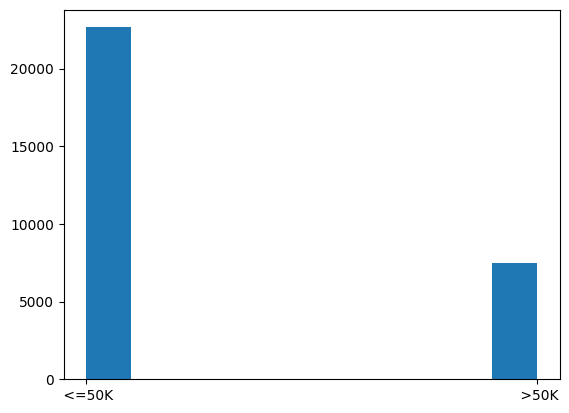

In [52]:
import matplotlib.pyplot as plt
plt.hist(train_df['Salary'])

In [54]:

test_df['maritalstatus'].value_counts()

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [56]:
train_df[train_df.duplicated()].shape

(3258, 14)

In [58]:
train_df[train_df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [60]:
Train =train_df.drop_duplicates()

In [62]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [64]:
Train.isnull().sum().sum()
## there is no nan values in the Train Data set

0

In [66]:

test_df[test_df.duplicated()].shape

(930, 14)

In [68]:
test_df[test_df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [70]:
Test=test_df.drop_duplicates()

In [72]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [74]:
Test.isnull().sum().sum()
## there is no nan values in the Train Data set

0

In [76]:
Train['Salary'].value_counts()


 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [78]:
Test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [80]:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,2816,475
Armed-Forces,8,1
Craft-repair,2472,757
Exec-managerial,1903,1743
Farming-fishing,843,114
Handlers-cleaners,1081,78
Machine-op-inspct,1442,223
Other-service,2782,132
Priv-house-serv,140,1


In [82]:
pd.crosstab(Train['workclass'],Train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,573,356
Local-gov,1421,593
Private,14902,4311
Self-emp-inc,466,583
Self-emp-not-inc,1733,698
State-gov,914,339
Without-pay,14,0


In [84]:
pd.crosstab(Train['workclass'],Train['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,309,9,62,175,8,22,14,34,0,165,27,14,66,24
Local-gov,277,0,139,211,28,46,11,187,0,667,291,7,38,112
Private,2378,0,2391,2333,430,1064,1581,2370,141,2042,185,2530,669,1099
Self-emp-inc,28,0,97,369,51,2,10,27,0,156,5,275,3,26
Self-emp-not-inc,49,0,487,375,419,15,35,173,0,360,6,368,26,118
State-gov,247,0,52,183,15,9,13,122,0,393,112,11,56,40
Without-pay,3,0,1,0,6,1,1,1,0,0,0,0,0,1


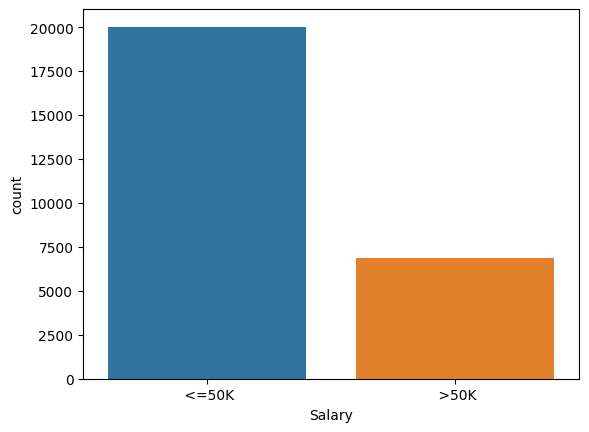

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [86]:
import seaborn as sns
sns.countplot(x='Salary',data= Train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()


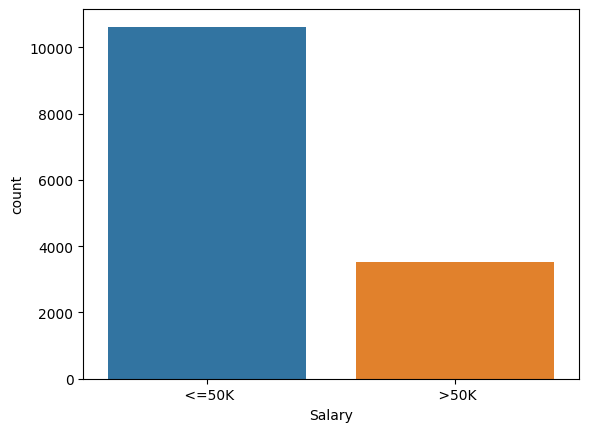

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [88]:
sns.countplot(x='Salary',data= Test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Test['Salary'].value_counts()

<Axes: xlabel='education'>

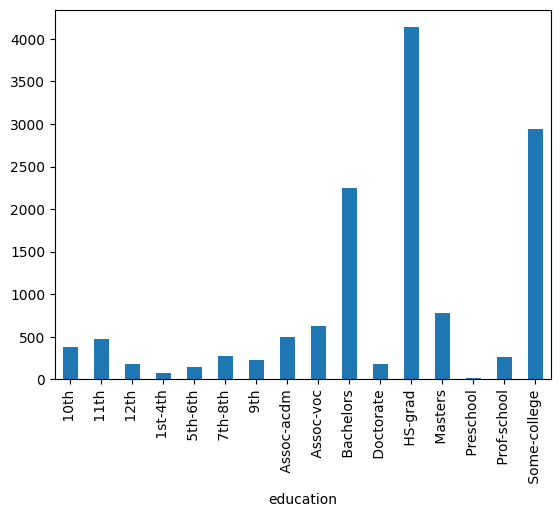

In [90]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

In [92]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [94]:
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

C:\Users\Hp\AppData\Local\Temp\ipykernel_14932\1645268687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train[i]= number.fit_transform(Train[i])
C:\Users\Hp\AppData\Local\Temp\ipykernel_14932\1645268687.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test[i]=number.fit_transform(Test[i])
C:\Users\Hp\AppData\Local\Temp\ipykernel_14932\1645268687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [96]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,>50K
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,<=50K
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K


In [98]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [100]:
colnames=Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [102]:
# storing the values in x_train,y_train,x_test & y_test for spliting the data in train and test for analysis
x_train = Train[colnames[0:13]].values
y_train = Train[colnames[13]].values
x_test = Test[colnames[0:13]].values
y_test = Test[colnames[13]].values

In [104]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [106]:
x_train

array([[39,  5,  9, ...,  0, 40, 37],
       [50,  4,  9, ...,  0, 13, 37],
       [38,  2, 11, ...,  0, 40, 37],
       ...,
       [27,  2,  7, ...,  0, 38, 37],
       [58,  2, 11, ...,  0, 40, 37],
       [52,  3, 11, ...,  0, 40, 37]], dtype=int64)

In [108]:
x_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]], dtype=int64)

In [110]:
y_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [112]:
y_test

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [126]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [128]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB

M_model=MB()
train_pred_multi=M_model.fit(x_train,y_train).predict(x_train)
test_pred_multi=M_model.fit(x_train,y_train).predict(x_test)

In [134]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi ## train accuracy 74.42

0.7442664386871353

In [136]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi ## test acuracy 75.15

0.7515923566878981

In [146]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi ## test acuracy 75.15

0.7515923566878981

In [148]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [150]:
#print the matrix
confusion_matrix

array([[10620,     0],
       [ 3510,     0]], dtype=int64)